## SkillupAI ML東京20期 通し課題 Day1_work_村井智哉

- データセット名  Kickstarter Projects
- URL https://www.kaggle.com/kemical/kickstarter-projects

### もくじ
1. ライブラリの読み込み
2. データの読み込み
3. データ各項目の確認
　3.1 データ全体
　3.2 各項目
4. 数値項目間の関係
5. stateと数値項目の関係
6. データ検討結果のまとめ
7. ロジスティック回帰

## 1. ライブラリの読み込み

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, confusion_matrix
                                                        # 分類問題の性能評価
from sklearn.model_selection import train_test_split    # ホールアウト法
from sklearn.model_selection import KFold               # 交差検証法
from sklearn.preprocessing import MinMaxScaler          # 正規化
from sklearn.preprocessing import StandardScaler        # 標準化

### from mpl_toolkits.mplot3d import Axes3D                 # 3D描画
### from scipy import genfromtxt                            # 3D描画

## 2. データの読み込み

Kickstarter（キックスターター）とは2009年に設立されたアメリカ合衆国の民間営利企業で、自社のウェブサイトにおいてクリエイティブなプロジェクトに向けてクラウドファンディングによる資金調達を行う手段を提供している。

|項目            |種類|内容                  |
|----------------|----|----------------------|
|ID	             |key |ID　　　　　　　　　　|
|name	         |文字|名前(Kickstarterの?)　|
|category	     |文字|種類　　　　　　　　　|
|main_category	 |文字|主な種類　　　　　　　|
|currency	     |通貨|通貨　　　　　　　　　|
|deadline	     |日付|締切　　　　　　　　　|
|goal	         |数値|目標金額　　　　　　　|
|launched	     |日付|発売日付　　　　　　　|
|pledged	     |数値|約束された金額　　　　|
|state	         |文字|状態　■目的変数　　　|
|backers	     |数値|後援者　　　　　　　　|
|country	     |文字|国名コード　　　　　　|
|usd pledged	 |数値|約束された米ドル　　　|
|usd_pledged_real|数値|実際に約束された米ドル|	
|usd_goal_real   |数値|実際の米ドルの目標　　|


In [2]:
df_ksp = pd.read_csv("./input/ks-projects-201801.csv")

In [3]:
display(df_ksp.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## 3. データ各項目の確認

### 3.1 データ全体

In [4]:
# データ全体の行数、列数
print("df_ksp.shape=", df_ksp.shape)

df_ksp.shape= (378661, 15)


In [5]:
# 各項目の行数と型
df_ksp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


### 3.1.1 欠損値
【対応】欠損値がある行は1%程度のため、行を削除する。

|項目|件数、割合|
|----|----------|
|name|4件÷378661=1.0563538362810007e-05|
|use pledged|3797件÷378661=0.0100274387908974|

In [6]:
# 各項目の欠損値
df_ksp.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
df_ksp[df_ksp["name"].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


In [8]:
df_ksp[df_ksp["usd pledged"].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
824,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN,4251.14,3572.39
844,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN,6370.00,5000.00
864,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN,6695.00,6000.00
870,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN,2926.00,2750.00
890,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,1200.0,2015-11-11 21:02:55,1585.00,undefined,0,"N,0""",NaN,1585.00,1200.00


In [9]:
df_ksp2 = df_ksp.dropna(how="any")

In [10]:
df_ksp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
ID                  374860 non-null int64
name                374860 non-null object
category            374860 non-null object
main_category       374860 non-null object
currency            374860 non-null object
deadline            374860 non-null object
goal                374860 non-null float64
launched            374860 non-null object
pledged             374860 non-null float64
state               374860 non-null object
backers             374860 non-null int64
country             374860 non-null object
usd pledged         374860 non-null float64
usd_pledged_real    374860 non-null float64
usd_goal_real       374860 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


In [11]:
df_ksp2.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

### 3.2 各項目

### 3.2.1 項目 state (状態)
(1) 題意より'successful'をTrue、その他をFalseとして扱う。

|項目        |内容          |
|------------|--------------|
|'canceled'  |×　キャンセル　　　　　　　　　|
|'failed'    |×　失敗した　　　　　　　　　　|
|'live'      |×　生きている　　　　　　　　　|
|'successful'|〇　成功した　　　　　　　　　　|
|'suspended' |×　中断された　　　　　　　　　|
|'undefined' |×　未定義(欠損値削除時に削除済)|

In [12]:
# 項目 state の概要確認
tmp = df_ksp2["state"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 5


array(['canceled', 'failed', 'live', 'successful', 'suspended'],
      dtype=object)

In [13]:
df_ksp2.loc[df_ksp2["state"] == "canceled"  , "state"] = False
df_ksp2.loc[df_ksp2["state"] == "failed"    , "state"] = False
df_ksp2.loc[df_ksp2["state"] == "live"      , "state"] = False
df_ksp2.loc[df_ksp2["state"] == "successful", "state"] = True
df_ksp2.loc[df_ksp2["state"] == "suspended" , "state"] = False

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
df_ksp2["state"].unique()

array([False,  True])

In [15]:
df_ksp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
ID                  374860 non-null int64
name                374860 non-null object
category            374860 non-null object
main_category       374860 non-null object
currency            374860 non-null object
deadline            374860 non-null object
goal                374860 non-null float64
launched            374860 non-null object
pledged             374860 non-null float64
state               374860 non-null bool
backers             374860 non-null int64
country             374860 non-null object
usd pledged         374860 non-null float64
usd_pledged_real    374860 non-null float64
usd_goal_real       374860 non-null float64
dtypes: bool(1), float64(5), int64(2), object(7)
memory usage: 43.3+ MB


In [16]:
df_ksp2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,False,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,False,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,False,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,False,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,False,14,US,1283.0,1283.0,19500.00


### 3.2.2 項目 ID
(1) IDはすべて異なるため、stateとの関係は、特にないと考える。

In [17]:
# 項目 ID の概要確認
tmp = df_ksp2["ID"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 374860


array([      5971,      18520,      21109, ..., 2147466649, 2147472329,
       2147476221], dtype=int64)

### 3.2.3 項目 name
(1) 内容は、Kickstarterのプロジェクト名と思われる。  
(2) nameは372068種類あり、ほぼすべて異なるため、stateとの関係は、特にないと考える。

In [18]:
# 項目 name の概要確認
tmp = df_ksp2["name"].unique()
print("num of unique=", len(tmp))
tmp

num of unique= 372068


array(['The Songs of Adelaide & Abullah',
       'Greeting From Earth: ZGAC Arts Capsule For ET', 'Where is Hank?',
       ...,
       'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!',
       'BioDefense Education Kit', 'Nou Renmen Ayiti!  We Love Haiti!'],
      dtype=object)

### 3.2.4 項目 category (種類)
(1) 内容は、kickstarterプロジェクトの種類である。  
(2) stateとの関係としては、categoryが"Residencies"および"Chiptune"の場合、70%以上がstate="successful"となる。  
(3) 項目category2 = "Residencies"および"Chiptune"はcategory=True、その他はFalseとする。

In [19]:
# 項目 category の概要確認
tmp = df_ksp2["category"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 159


array(['3D Printing', 'Academic', 'Accessories', 'Action', 'Animals',
       'Animation', 'Anthologies', 'Apparel', 'Apps', 'Architecture',
       'Art', 'Art Books', 'Audio', 'Bacon', 'Blues', 'Calendars',
       'Camera Equipment', 'Candles', 'Ceramics', "Children's Books",
       'Childrenswear', 'Chiptune', 'Civic Design', 'Classical Music',
       'Comedy', 'Comic Books', 'Comics', 'Community Gardens',
       'Conceptual Art', 'Cookbooks', 'Country & Folk', 'Couture',
       'Crafts', 'Crochet', 'DIY', 'DIY Electronics', 'Dance', 'Design',
       'Digital Art', 'Documentary', 'Drama', 'Drinks',
       'Electronic Music', 'Embroidery', 'Events', 'Experimental',
       'Fabrication Tools', 'Faith', 'Family', 'Fantasy',
       "Farmer's Markets", 'Farms', 'Fashion', 'Festivals', 'Fiction',
       'Film & Video', 'Fine Art', 'Flight', 'Food', 'Food Trucks',
       'Footwear', 'Gadgets', 'Games', 'Gaming Hardware', 'Glass',
       'Graphic Design', 'Graphic Novels', 'Hardware', 'Hip-Ho

In [20]:
df_ksp2_tmp = pd.get_dummies(df_ksp2["category"])
df_ksp2_tmp["state"] = df_ksp2["state"]
df_ksp2_tmp_true     = df_ksp2_tmp.loc[df_ksp2_tmp["state"] == True, :].sum()
df_ksp2_tmp_all      = df_ksp2_tmp.sum()
df_ksp2_tmp_rate     = df_ksp2_tmp_true / df_ksp2_tmp_all
df_ksp2_tmp_rate.loc[df_ksp2_tmp_rate > 0.6].sort_values()

Performances       0.615992
Theater            0.624291
Classical Music    0.630310
Country & Folk     0.631768
Letterpress        0.632653
Indie Rock         0.639562
Dance              0.664369
Anthologies        0.664541
Residencies        0.724638
Chiptune           0.771429
state              1.000000
dtype: float64

In [21]:
len(df_ksp2.loc[df_ksp2["category"] == "Residencies"])

69

In [22]:
len(df_ksp2.loc[df_ksp2["category"] == "Chiptune"])

35

In [23]:
df_ksp2.loc[:, "category2"] \
    = (df_ksp2["category"] == "Residencies") \
    | (df_ksp2["category"] == "Chiptune")
len(df_ksp2.loc[df_ksp2["category2"] == True, "category2"])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


104

### 3.2.5 項目 main_category (主な種類)
(1) 内容は、kickstarterプロジェクトの主な種類である。  
(2) stateとの関係は、特にない。(state="successfull"となるのは、最も大きい"Dance"で62%)

In [24]:
# 項目 main_category の概要確認
tmp=df_ksp2["main_category"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 15


array(['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion',
       'Film & Video', 'Food', 'Games', 'Journalism', 'Music',
       'Photography', 'Publishing', 'Technology', 'Theater'], dtype=object)

In [25]:
df_ksp2_tmp = pd.get_dummies(df_ksp2["main_category"])
df_ksp2_tmp["state"] = df_ksp2["state"]
df_ksp2_tmp_true     = df_ksp2_tmp.loc[df_ksp2_tmp["state"] == True, :].sum()
df_ksp2_tmp_all      = df_ksp2_tmp.sum()
df_ksp2_tmp_rate     = df_ksp2_tmp_true / df_ksp2_tmp_all
df_ksp2_tmp_rate.loc[df_ksp2_tmp_rate > 0.6].sort_values()

Dance    0.620653
state    1.000000
dtype: float64

### 3.2.6 項目 currency (通貨)
(1) 内容は、通貨の種類である。  
(2) stateとの関係は、特にない。

In [26]:
# 項目 currency の概要確認
tmp = df_ksp2["currency"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 14


array(['AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY', 'MXN',
       'NOK', 'NZD', 'SEK', 'SGD', 'USD'], dtype=object)

In [27]:
df_ksp2_tmp = pd.get_dummies(df_ksp2["currency"])
df_ksp2_tmp["state"] = df_ksp2["state"]
df_ksp2_tmp_true     = df_ksp2_tmp.loc[df_ksp2_tmp["state"] == True, :].sum()
df_ksp2_tmp_all      = df_ksp2_tmp.sum()
df_ksp2_tmp_rate     = df_ksp2_tmp_true / df_ksp2_tmp_all
df_ksp2_tmp_rate.loc[df_ksp2_tmp_rate > 0.3].sort_values()

NZD      0.309606
SGD      0.320721
DKK      0.323450
HKD      0.349515
GBP      0.358380
USD      0.373513
state    1.000000
dtype: float64

### 3.2.7 項目 deadline (締切)
(1) 内容は、kickstarterプロジェクトの締切の日付である。  
(2) stateとの関係は、無いと考える。(9年間約3300日の期間に3164種類の日付が存在する)

In [28]:
# 項目 deadline の概要確認
tmp = df_ksp2["deadline"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 3164


array(['2009-05-03', '2009-05-16', '2009-05-20', ..., '2018-03-01',
       '2018-03-02', '2018-03-03'], dtype=object)

In [29]:
(2018 - 2009) * 365

3285

### 3.2.8 項目 goal (目標金額)
(1) 内容は、kickstarterプロジェクトの目標金額である。

In [30]:
# 項目 goal の概要確認
tmp = df_ksp2["goal"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 8312


array([1.0e-02, 1.5e-01, 5.0e-01, ..., 8.0e+07, 9.9e+07, 1.0e+08])

### 3.2.9 項目 launched (発売日時)
(1) 内容は、kickstarterプロジェクトの発売日付である。  
(2) stateとの関係は、無いと考えるが、要確認。

In [31]:
# 項目 launched の概要確認
tmp = df_ksp2["launched"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 374298


array(['1970-01-01 01:00:00', '2009-04-21 21:02:48',
       '2009-04-23 00:07:53', ..., '2018-01-02 14:17:46',
       '2018-01-02 14:38:17', '2018-01-02 15:02:31'], dtype=object)

### 3.2.10 項目 pledged (約束された金額)
(1) 内容は、kickstarterプロジェクトの種類である。

In [32]:
# 項目 pledged の概要確認
tmp = df_ksp2["pledged"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 61936


array([0.00000000e+00, 1.00000000e+00, 1.01000000e+00, ...,
       1.27798435e+07, 1.32852264e+07, 2.03389863e+07])

### 3.2.11 項目 backers (後援者)
(1) 内容は、kickstarterプロジェクトの後援者の人数である。

In [33]:
# 項目 backers の概要確認
tmp = df_ksp2["backers"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 3963


array([     0,      1,      2, ..., 105857, 154926, 219382], dtype=int64)

### 3.2.12 項目 country (国名コード)
(1) 内容は、kickstarterプロジェクトに注文した国名である。  
(2) stateとの関係は、特にない。

In [34]:
# 項目 country の概要確認
tmp = df_ksp2["country"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 22


array(['AT', 'AU', 'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR', 'GB', 'HK',
       'IE', 'IT', 'JP', 'LU', 'MX', 'NL', 'NO', 'NZ', 'SE', 'SG', 'US'],
      dtype=object)

In [50]:
df_ksp2_tmp = pd.get_dummies(df_ksp2["country"])
df_ksp2_tmp["state"] = df_ksp2["state"]
df_ksp2_tmp_true     = df_ksp2_tmp.loc[df_ksp2_tmp["state"] == True, :].sum()
df_ksp2_tmp_all      = df_ksp2_tmp.sum()
df_ksp2_tmp_rate     = df_ksp2_tmp_true / df_ksp2_tmp_all
df_ksp2_tmp_rate.loc[df_ksp2_tmp_rate > 0.3].sort_values()

LU       0.306452
FR       0.308949
NZ       0.309606
SG       0.320721
DK       0.323450
HK       0.349515
GB       0.358380
US       0.373513
state    1.000000
dtype: float64

### 3.2.13 項目 usd pledged (約束された米ドル)
(1) 内容は、kickstarterプロジェクトへの米ドルによる入金予定金額である。【?】

In [36]:
# 項目 usd pledged の概要確認
tmp = df_ksp2["usd pledged"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 95454


array([0.00000000e+00, 4.70000000e-01, 4.80000000e-01, ...,
       1.27798435e+07, 1.32852264e+07, 2.03389863e+07])

### 3.2.14 項目 usd_pledged_real (実際に約束された米ドル)
(1) 内容は、kickstarterプロジェクトへの米ドルによる実際に入金された金額である。【?】

In [37]:
# 項目 usd_pledged_real の概要確認
tmp = df_ksp2["usd_pledged_real"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 105383


array([0.00000000e+00, 4.50000000e-01, 4.70000000e-01, ...,
       1.27798435e+07, 1.32852264e+07, 2.03389863e+07])

### 3.2.15 項目 usd_goal_real (実際の米ドルの目標)
(1) 内容は、kickstarterプロジェクトへの米ドルによる実際に入金された金額である。【?】

In [38]:
# 項目 usd_goal_real の概要確認
tmp = df_ksp2["usd_goal_real"].unique()
print("num of unique=", len(tmp))
np.sort(tmp)

num of unique= 50032


array([1.00000000e-02, 1.50000000e-01, 4.90000000e-01, ...,
       1.10169772e+08, 1.51395870e+08, 1.66361391e+08])

### 4 数値項目間の関係

### 4.1 要約統計量

In [39]:
df_ksp2.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.748600e+05,3.748600e+05,3.748600e+05,374860.000000,3.748600e+05,3.748600e+05,3.748600e+05
mean,1.074652e+09,4.952299e+04,9.750538e+03,106.688366,7.036802e+03,9.120899e+03,4.586303e+04
std,6.191368e+08,1.189362e+06,9.601094e+04,911.710124,7.864016e+04,9.131969e+04,1.158767e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.380633e+08,2.000000e+03,3.100000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075289e+09,5.500000e+03,6.200000e+02,12.000000,3.947650e+02,6.244950e+02,5.500000e+03
75%,1.610137e+09,1.650000e+04,4.080000e+03,57.000000,3.034425e+03,4.050895e+03,1.600000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


### 4.2 相関係数

### 4.2.1 散布図行列 (pandas)

<IPython.core.display.Javascript object>


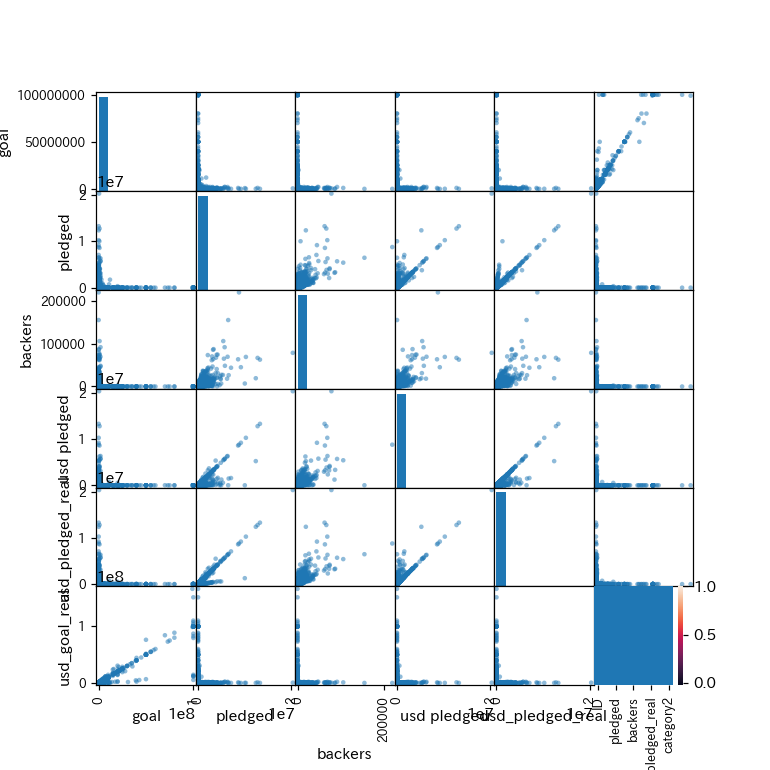

In [40]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(
    df_ksp2[["goal", "pledged", "backers", 
             "usd pledged", "usd_pledged_real", "usd_goal_real"]],
    figsize=(7, 7))
plt.show()

### 4.2.2 相関係数 (pandas)

In [41]:
# 相関係数を確認
df_ksp2.corr()

,ID,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,category2
ID,1.000000,0.001692,0.000478,-0.001068,0.000673,-0.000633,-0.000016,0.001868,-0.000232
goal,0.001692,1.000000,0.007327,-0.024660,0.003969,0.005534,0.005072,0.942691,-0.000493
pledged,0.000478,0.007327,1.000000,0.111337,0.717858,0.857370,0.952736,0.004992,-0.000213
state,-0.001068,-0.024660,0.111337,1.000000,0.128692,0.097791,0.110526,-0.023363,0.013327
backers,0.000673,0.003969,0.717858,0.128692,1.000000,0.697426,0.753449,0.004476,0.001264
usd pledged,-0.000633,0.005534,0.857370,0.097791,0.697426,1.000000,0.907743,0.006172,0.000073
usd_pledged_real,-0.000016,0.005072,0.952736,0.110526,0.753449,0.907743,1.000000,0.005566,-0.000176
usd_goal_real,0.001868,0.942691,0.004992,-0.023363,0.004476,0.006172,0.005566,1.000000,-0.000513
category2,-0.000232,-0.000493,-0.000213,0.013327,0.001264,0.000073,-0.000176,-0.000513,1.000000


### 4.3 ヒートマップ
- なぜか、表示されないことがある。

In [42]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_ksp2.corr())
plt.show()

### 5. stateと数値項目の関係
(1) 線形分離が可能な組合せ
- goal と pledged
- goal と backers
- goal と usd pledged
- goal と usd_predged_real
- usd_goal_real と pledged
- usd_goal_real と backers
- usd_goal_real と usd pledged  

<IPython.core.display.Javascript object>


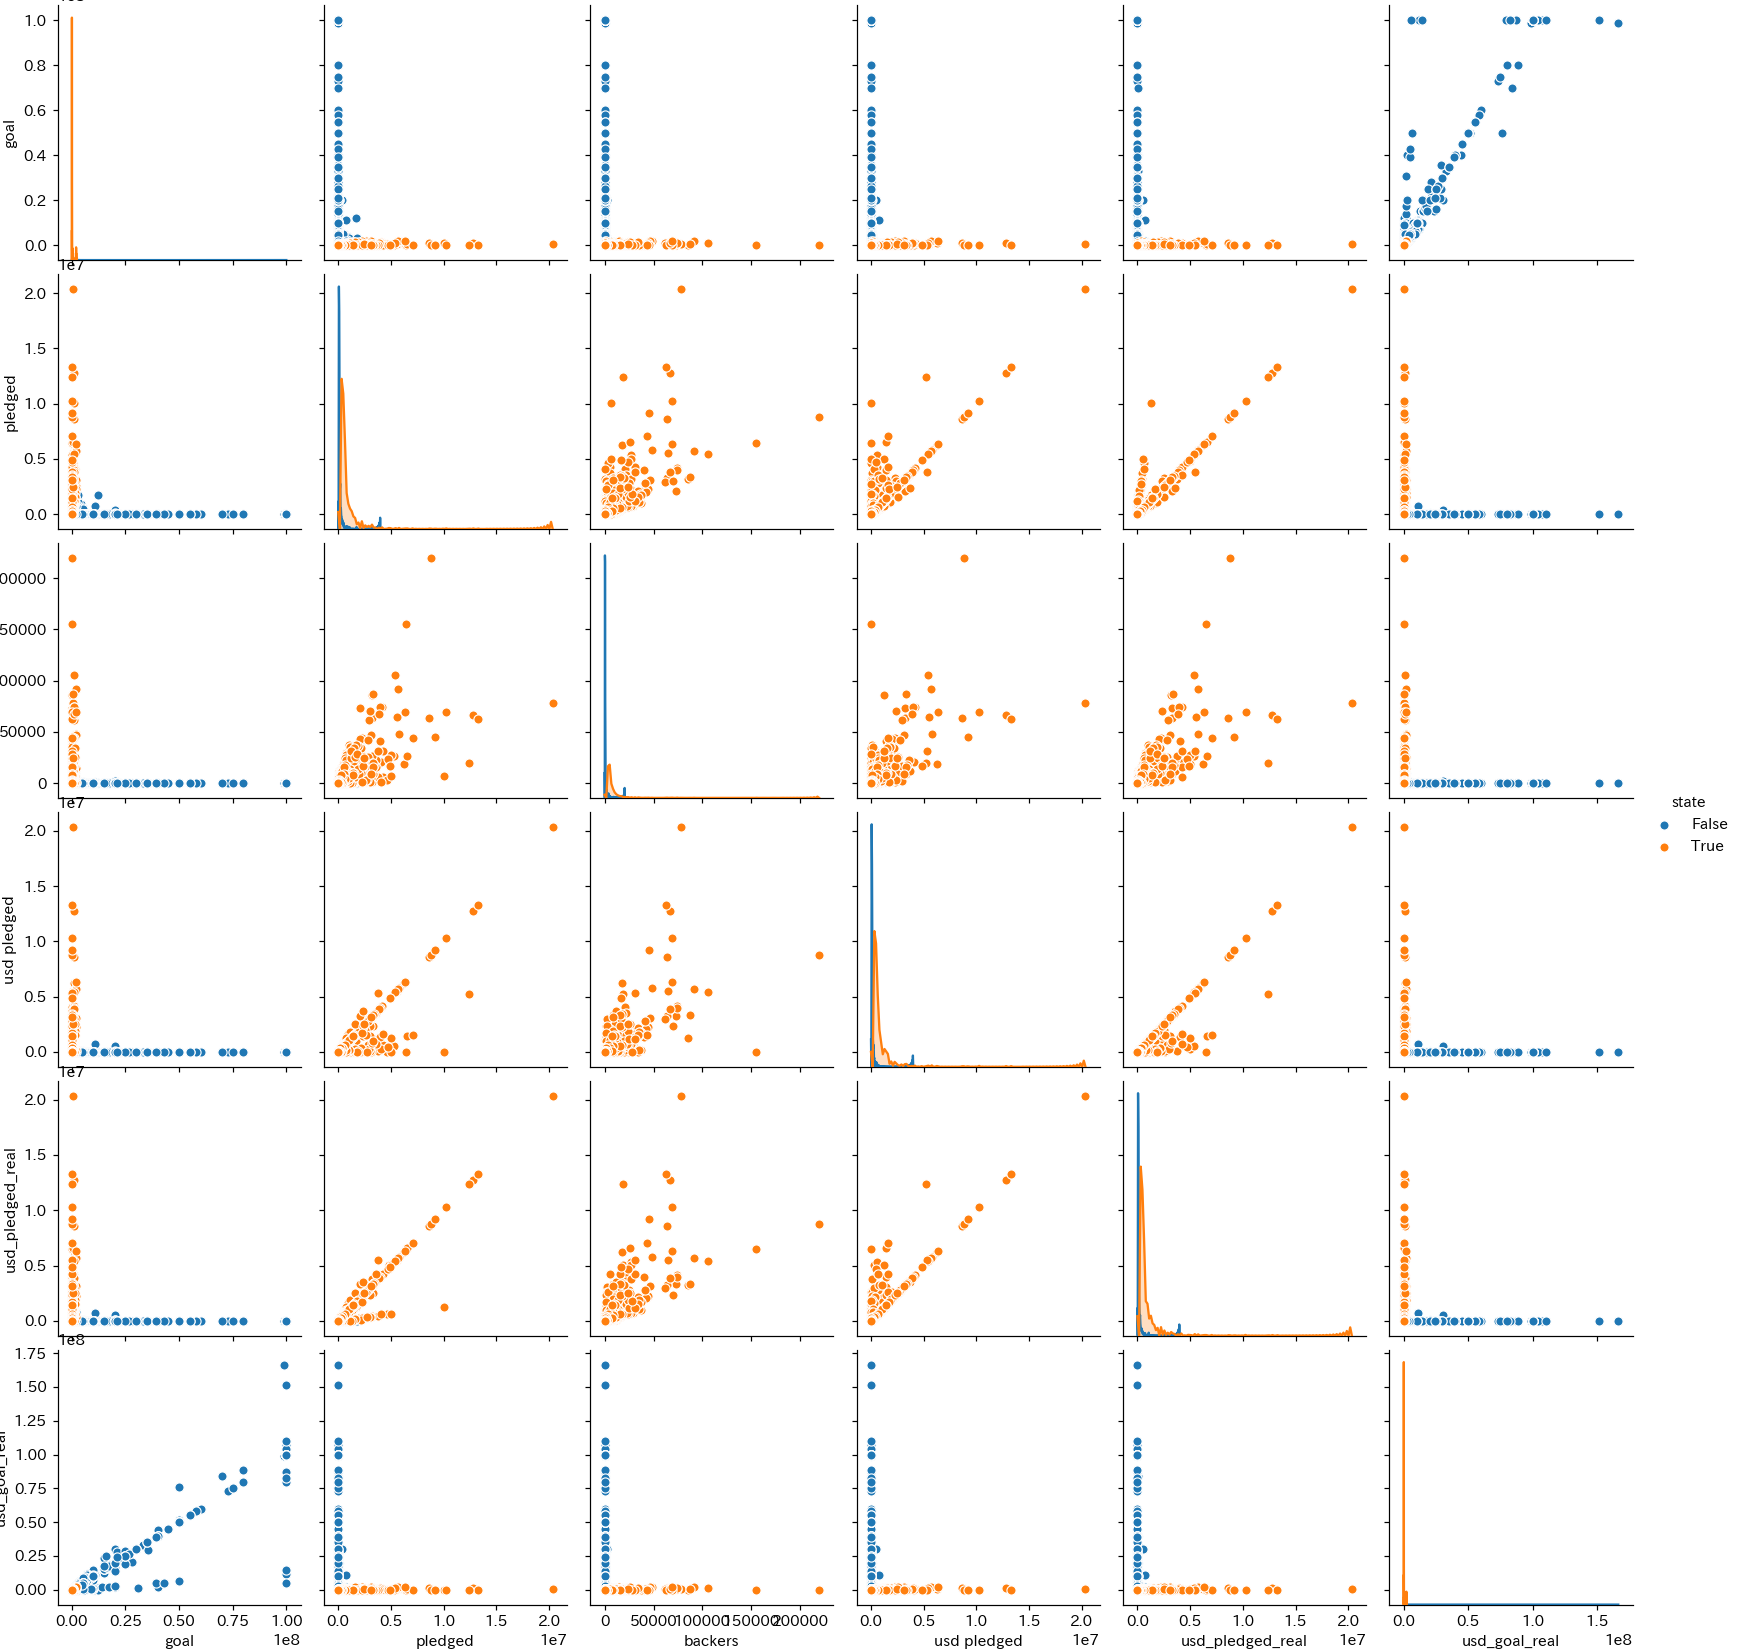

In [43]:
sns.pairplot(df_ksp2[["state", "goal", "pledged", "backers", "usd pledged", 
                      "usd_pledged_real", "usd_goal_real"]], hue="state")

### 6. データ検討結果のまとめ
(1) 項目categoryが"Residencies"または"Chiptune"の場合、70%以上がstate="successful"となる。  

(2) 数値項目にて、線形分離が可能な組合せ
- goal と pledged
- goal と backers
- goal と usd pledged
- goal と usd_predged_real
- usd_goal_real と pledged
- usd_goal_real と backers
- usd_goal_real と usd pledged

### 7. ロジスティック回帰

### 7.1 数値項目によるロジスティック回帰

In [44]:
y = df_ksp2["state"].values
X = df_ksp2[["goal", "pledged", "backers", "usd pledged", 
             "usd_pledged_real", "usd_goal_real"]]
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, 
                    fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]
w4 = clf.coef_[0, 3]
w5 = clf.coef_[0, 4]
w6 = clf.coef_[0, 5]

print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, '.format(w0, w1, w2), end="")
print('w3 = {:.3f}, w4 = {:.3f}'.format(w3, w4))
print('w5 = {:.3f}, w6 = {:.3f}'.format(w5, w6))

w0 = 504.557, w1 = -1157.518, w2 = 1149.420, w3 = 9527.327, w4 = 747.838
w5 = 852.851, w6 = -1266.849


In [45]:
# ラベルを予測
y_est = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est)))

# 正答率を表示
print('正答率(accuracy) = {:.3f}%  recall = {:.3f}  precision = {:.3f}'.format(
    100 * accuracy_score(y, y_est), 
    100 * recall_score(y, y_est), 
    100 * precision_score(y, y_est)))

対数尤度 = -0.834
正答率(accuracy) = 97.584%  recall = 94.797  precision = 98.379


In [46]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = リノベーションなし', '正解 = リノベーション済み'], 
                        columns=['予測 = リノベーションなし', '予測 = リノベーション済み'])
conf_mat

,予測 = リノベーションなし,予測 = リノベーション済み
正解 = リノベーションなし,238918,2091
正解 = リノベーション済み,6964,126887


### 7.2 数値項目と項目categoryによるロジスティック回帰
(1) 検討条件
- 上記7.1に項目category2(categoryが"Residencies"または"Chiptune")を追加。 

(2) 検討結果
- 上記7.1と同じ結果となった。  

(3) 考察
- category2の重みw7は1.313であり、他の重みより2桁から3桁小さいため、影響を与えられなかった。

In [47]:
y = df_ksp2["state"].values
X = df_ksp2[["goal", "pledged", "backers", "usd pledged", 
             "usd_pledged_real", "usd_goal_real", "category2"]]
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, 
                    fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]
w4 = clf.coef_[0, 3]
w5 = clf.coef_[0, 4]
w6 = clf.coef_[0, 5]
w7 = clf.coef_[0, 6]

print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, '.format(w0, w1, w2), end="")
print('w3 = {:.3f}, w4 = {:.3f}'.format(w3, w4))
print('w5 = {:.3f}, w6 = {:.3f}, w7 = {:.3f}'.format(w5, w6, w7))

w0 = 504.557, w1 = -1157.518, w2 = 1149.420, w3 = 9527.327, w4 = 747.838
w5 = 852.851, w6 = -1266.849, w7 = 1.313


In [48]:
# ラベルを予測
y_est = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est)))

# 正答率を表示
print('正答率(accuracy) = {:.3f}%  recall = {:.3f}  precision = {:.3f}'.format(
    100 * accuracy_score(y, y_est), 
    100 * recall_score(y, y_est), 
    100 * precision_score(y, y_est)))

対数尤度 = -0.834
正答率(accuracy) = 97.584%  recall = 94.797  precision = 98.379


In [49]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = リノベーションなし', '正解 = リノベーション済み'], 
                        columns=['予測 = リノベーションなし', '予測 = リノベーション済み'])
conf_mat

,予測 = リノベーションなし,予測 = リノベーション済み
正解 = リノベーションなし,238918,2091
正解 = リノベーション済み,6964,126887
